# Predicting Test Scores

#### Using Simple Linear Regression Model (SLRM)

We have a small student dataset consisting of two variables - hours of study and scores. We want to develop a model to predict the students' scores from the hours of study they put in. Hence, we shall use a Simple Linear Regression technique with the following steps:

1) Exploring Data + Visualisation

2) Preparing Data

3) Modeling on Training Data

4) Evaluating on Test Data

5) Try a random prediction

In [118]:
#importing libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
os.chdir("D:\Sanju_Folder\Internship\Sparks")

### 1) Exploring Data + Visualisation

In [138]:
#Reading data
data = pd.read_csv("Scores_data.csv")
print(data.shape)
print("Our data has 2 variables and 25 observations")

(25, 2)
Our data has 2 variables and 25 observations


In [121]:
# Viewing data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [122]:
# Data types
data.dtypes

Hours     float64
Scores      int64
dtype: object

Now that we have understood the dimensions of the dataset along with the data types and a brief idea about the values, let us explore each variable in detail through:

a) Univariate Analysis

b) Bivariate Analysis

#### a) Univariate Analysis

##### Hours of Study

Min Hours of Study: 1.1
Max Hours of Study: 9.2
Mean Hours of Study: 5.012
Median Hours of Study: 4.8


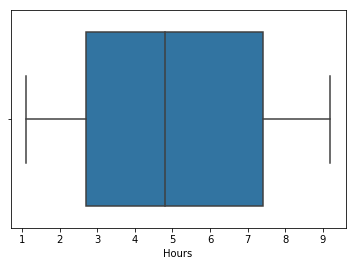

In [123]:
#Exploring Hours of Study
Mean = np.mean(data['Hours'])
Median = np.median(data['Hours'])
Max = np.max(data['Hours'])
Min = np.min(data['Hours'])
sns.boxplot(data['Hours'])
print("Min Hours of Study:",Min)
print("Max Hours of Study:",Max)
print("Mean Hours of Study:",Mean)
print("Median Hours of Study:",Median)

Upon observing the distribution of the variable 'Hours', we see that there are no outliers present, indicated by the boxplot. There is no significant difference between the mean and median hours of study. Therefore, no data cleaning is required here. We see that the students have studied for a roughly a minimum of 1 hour and a maximum of 9 hours. 

We can bucket the hours of study into 3 categories - 1 to 3 hours, 3 to 6 hours and greater than 6 hours. This is just to add some granularity to our analysis. We label these categories and Short, Moderation and Long and name the new variable as 'Duration. We can also observe the general behaviour of our students i.e proportion of students who study less/more.

Note that the variable so created will be a categorical variable.

##### Creating new variable 'Duration'

In [140]:
# Creating new variable

# List of conditions
conditions =[(data['Hours'] >= 1) & (data['Hours'] < 3),
              (data['Hours'] >= 3) & (data['Hours'] < 6),
               (data['Hours'] >= 6)]

# List of values for each condition
values = ['Short','Moderate','Long']

# Assigning values and creating variable
data['Duration'] = np.select(conditions,values)
data.head()

,Hours,Scores,Duration
0,2.5,21,Short
1,5.1,47,Moderate
2,3.2,27,Moderate
3,8.5,75,Long
4,3.5,30,Moderate


##### Duration

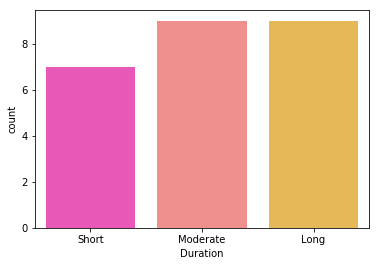

In [141]:
# Observing distribution of Duration
sns.countplot(data['Duration'], palette = 'spring')

So there is relatively higher proportion of students who study for Moderate and Long durations compared to Short durations.

#### b) Bivariate Analysis

##### Hours of study with Scores

Trend of Student Scores with Hours of Study


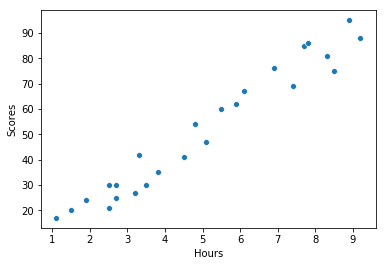

In [142]:
# Hours vs Score
sns.scatterplot(x=data['Hours'], y=data['Scores'], data =data)
print("Trend of Student Scores with Hours of Study")

#### Scores with Duration of study

Student Scores vs Duration of Study


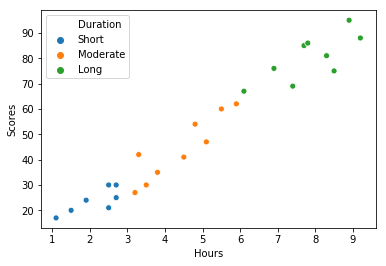

In [143]:
# Hours vs Score with Duration indicators
sns.scatterplot(x=data['Hours'], y=data['Scores'], data =data, hue = data['Duration'])
print("Student Scores vs Duration of Study")

So we observe that there is a positive correlation between no. of hours that students study and the scores they get. There does not also seem to be any exceptional case of low hours and high scores or vice-versa. Let us now look at the relative proportion of students who study less or more.

### 2) Preparing Data

In [130]:
# Rearranging columns
data1 = data[['Scores','Hours','Duration']]
data1.dtypes

Scores        int64
Hours       float64
Duration     object
dtype: object

In [131]:
# Marking dependent and independent variables
X = data1.iloc[:,1].values
Y = data1.iloc[:,0].values
#X1 = pd.DataFrame(data2['Hours'])
#Y1 = pd.DataFrame(data2['Scores'])
X = X.reshape((25,1))
Y = Y.reshape((25,1))
print(X.shape)
print(Y.shape)

(25, 1)
(25, 1)


In [133]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
print(X1_train.shape)
Y1_train.shape

(20, 1)


(20, 1)

### 3) Modeling on Training Data

In [134]:
from sklearn.linear_model import LinearRegression

# Creating instance
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

print('Regression coefficient is:', regressor.coef_)
print('Intercept is:',regressor.intercept_)

Regression coefficient is: [[9.83544438]]
Intercept is: [1.98942311]


<function matplotlib.pyplot.show(*args, **kw)>

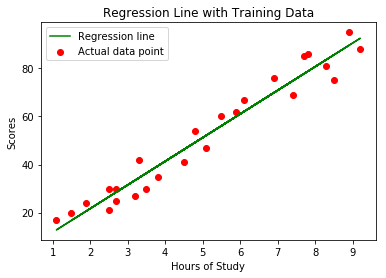

In [135]:
# Regression line
line = regressor.intercept_ + regressor.coef_*X

plt.scatter(X,Y,c='r', label='Actual data point')
plt.plot(X,line,c='g', label='Regression line')
plt.title('Regression Line with Training Data')
plt.xlabel('Hours of Study')
plt.ylabel('Scores')
plt.legend()
plt.show

### 4) Predicting on Test Data

In [54]:
# Creating predictions using model
Y_pred = regressor.predict(X_test)

In [136]:
# Evaluating with Mean Absolute Error on test data
from sklearn import metrics
print("Mean Absolute Error (MAE) is:",metrics.mean_absolute_error(Y_test,Y_pred))

Mean Absolute Error (MAE) is: 4.140342096254413


### 5) Trying a random prediction

In [77]:
# Applying model for use

Hours_studied = 6  #enter value here
input_value = [Hours_studied] 
deploy = pd.DataFrame(input_value)
Score_prediction = regressor.predict(deploy)
print('Predicted Score for',Hours_studied, 'hours of study is:',Score_prediction)

Predicted Score for 6 hours of study is: [[61.00208941]]
